In [11]:
import lstm

#Filename = "2002.csv"
#ColumnList = ["成交股數","成交金額","成交筆數","開盤價","最後揭示買價","最後揭示賣價","收盤價"]
#ColumnList = ["成交股數","成交金額","成交筆數","漲跌價差","最後揭示買價","最後揭示賣價","收盤價"]
#WindowSize = 50
#NumOfPredictDay = 1|7|10|30

Filename = "2317.csv"
ColumnList = ["成交股數","成交金額","成交筆數","開盤價","最後揭示買價","最後揭示賣價","收盤價"]
WindowSize = 50
NumOfPredictDay = 10

#載入資料
DataSet = lstm.LoadData(Filename, ColumnList, WindowSize, NumOfPredictDay)
#正規化資料
NormalizeData = lstm.NormaliseWindows(DataSet)
#切割資料
#x_train, y_train, x_test, y_test = lstm.SplitData(NormalizeData, ColumnList, NumOfPredictDay)
#sequence_length = WindowSize + NumOfPredictDay

#切割訓練資料
x_train, y_train = lstm.SplitDatatoTrain(NormalizeData, ColumnList, NumOfPredictDay)
#切割預測資料
x_predict = lstm.SplitDatatoPredict(DataSet, ColumnList, NumOfPredictDay)
x_predict = lstm.NormaliseWindows(x_predict)

(3266, 50, 7)
(3266, 10)
(1, 50, 7)


In [12]:
Layer = [len(ColumnList), 50, 100,NumOfPredictDay]
Loss = "mse"
Optimizer = "adam"

#建立LSTM模型
model = lstm.build_model(Layer,Loss,Optimizer)

BatchSize = 512
Epoch = 5
ValidationSplit = 0.1
#訓練LSTM模型
model.fit(  x_train,
            y_train,
            batch_size=BatchSize,
            nb_epoch=Epoch,
            validation_split=ValidationSplit)

> Compilation Time :  0.02845907211303711
Train on 2939 samples, validate on 327 samples
Epoch 1/5
2939/2939 [==============================] - 6s - loss: 2.2420 - val_loss: 0.0201
Epoch 2/5
2939/2939 [==============================] - 5s - loss: 2.2133 - val_loss: 0.0104
Epoch 3/5
2939/2939 [==============================] - 5s - loss: 2.2007 - val_loss: 0.0088
Epoch 4/5
2939/2939 [==============================] - 5s - loss: 2.1809 - val_loss: 0.0065
Epoch 5/5
2939/2939 [==============================] - 5s - loss: 2.1725 - val_loss: 0.0059


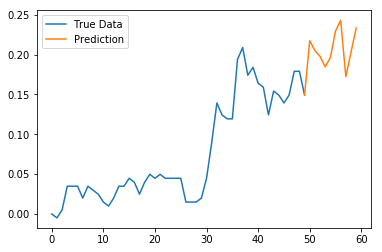

In [13]:
#預測
predictions = lstm.predict_point_by_point(model, x_predict)
lstm.plot_predict(predictions, NumOfPredictDay, x_predict)

(3265, 50, 7)
(3265, 10)
(1, 50, 7)
(10, 1)


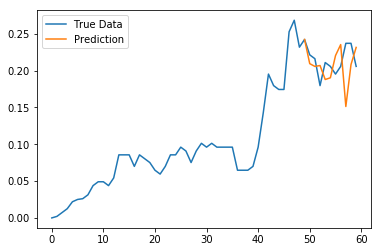

In [14]:
x_train, y_train, x_test, y_test = lstm.SplitDatatoTest(NormalizeData, ColumnList, NumOfPredictDay)
#預測
predictions = lstm.predict_point_by_point(model, x_test)
lstm.plot_predict(predictions, NumOfPredictDay, x_test, y_test)

(3017, 50, 7)
(3017, 10)
(1, 50, 7)
(10, 1)


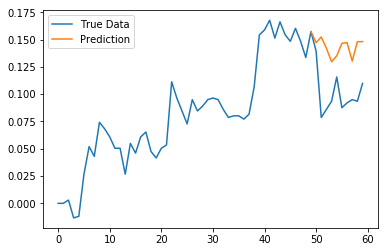

In [10]:
x_train, y_train, x_test, y_test = lstm.SplitDatatoTest(NormalizeData, ColumnList, NumOfPredictDay)
#預測
predictions = lstm.predict_point_by_point(model, x_test)
lstm.plot_predict(predictions, NumOfPredictDay, x_test, y_test)